In [30]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# ANIMALS
ANIMAL_IDS = ["R010", "R011", "R012"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [32]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-11-21 15:51:51,768][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 21 sessions for R010 between 2023-11-01 and 2023-11-21
fetched 22 sessions for R011 between 2023-11-01 and 2023-11-21
fetched 21 sessions for R012 between 2023-11-01 and 2023-11-21


In [33]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R012-_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2023-11-01 -> 2023-11-21
Returning appended df with entries between 2023-11-01 and 2023-11-21
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R012-_days_df.csv


In [35]:
trials_df.groupby("animal_id").pro_anti_hit_thresh.unique()

animal_id
R010    [nan, 0.55, 0.25]
R011          [nan, 0.55]
R012          [nan, 0.55]
Name: pro_anti_hit_thresh, dtype: object

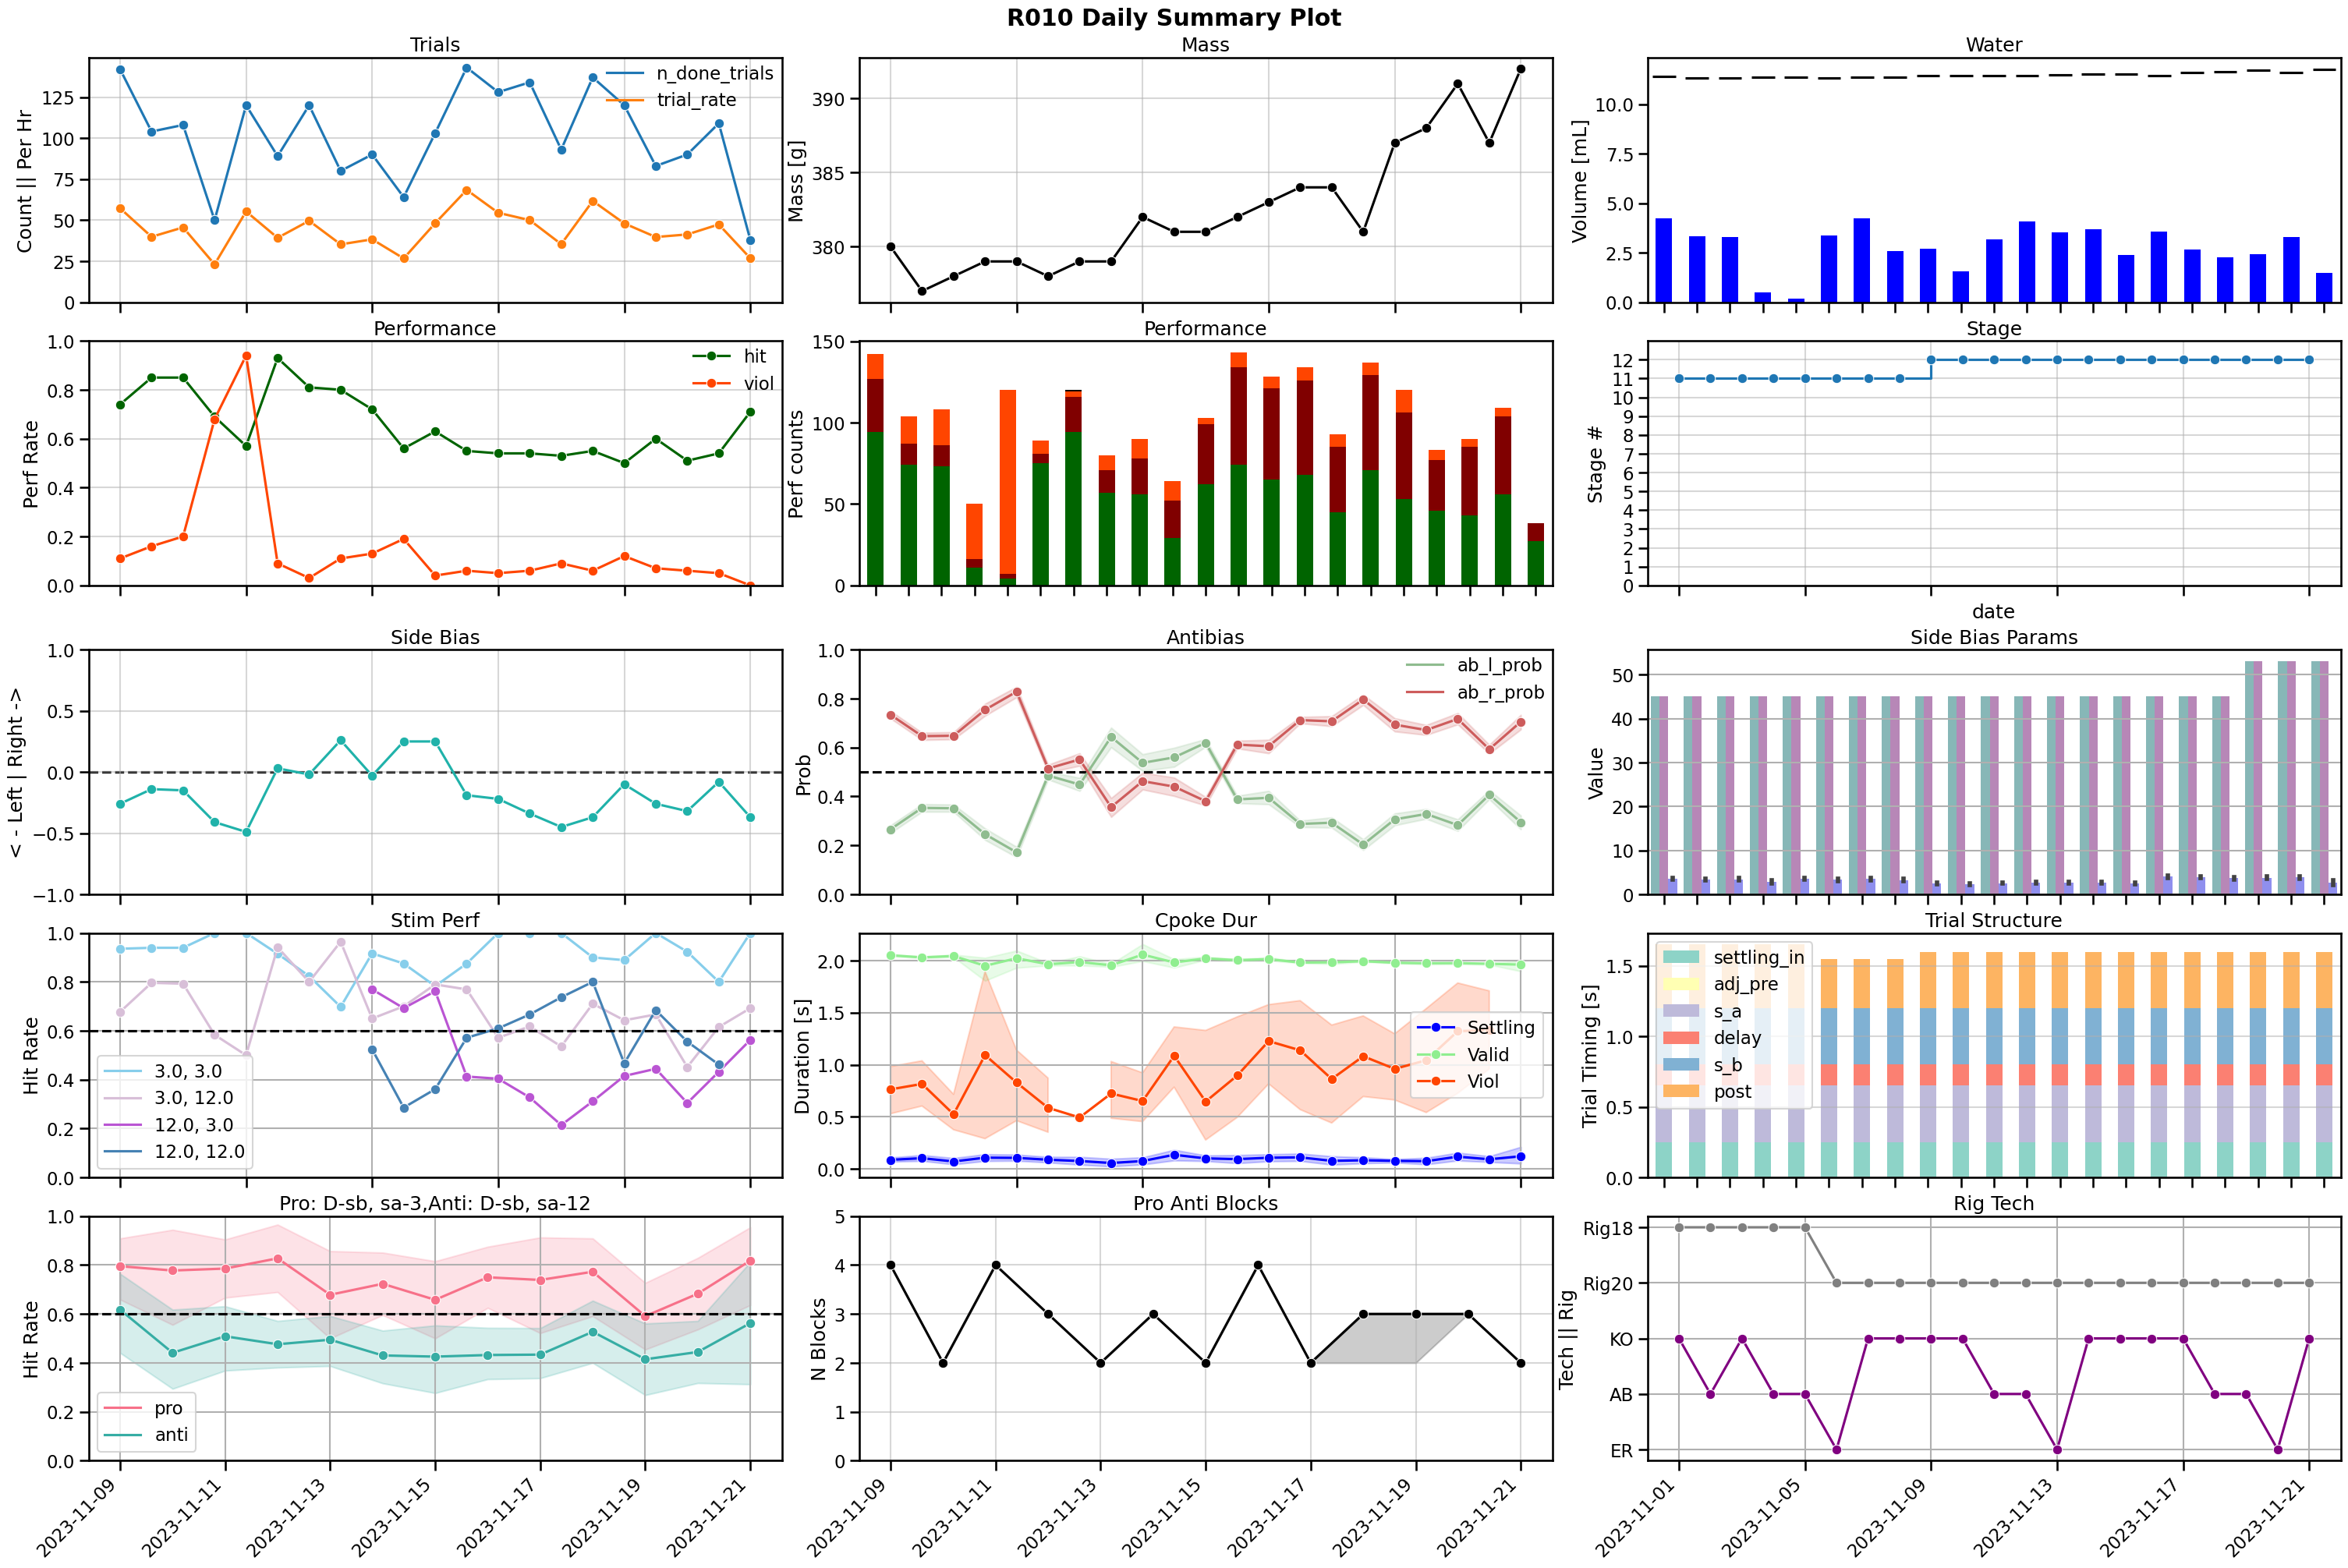

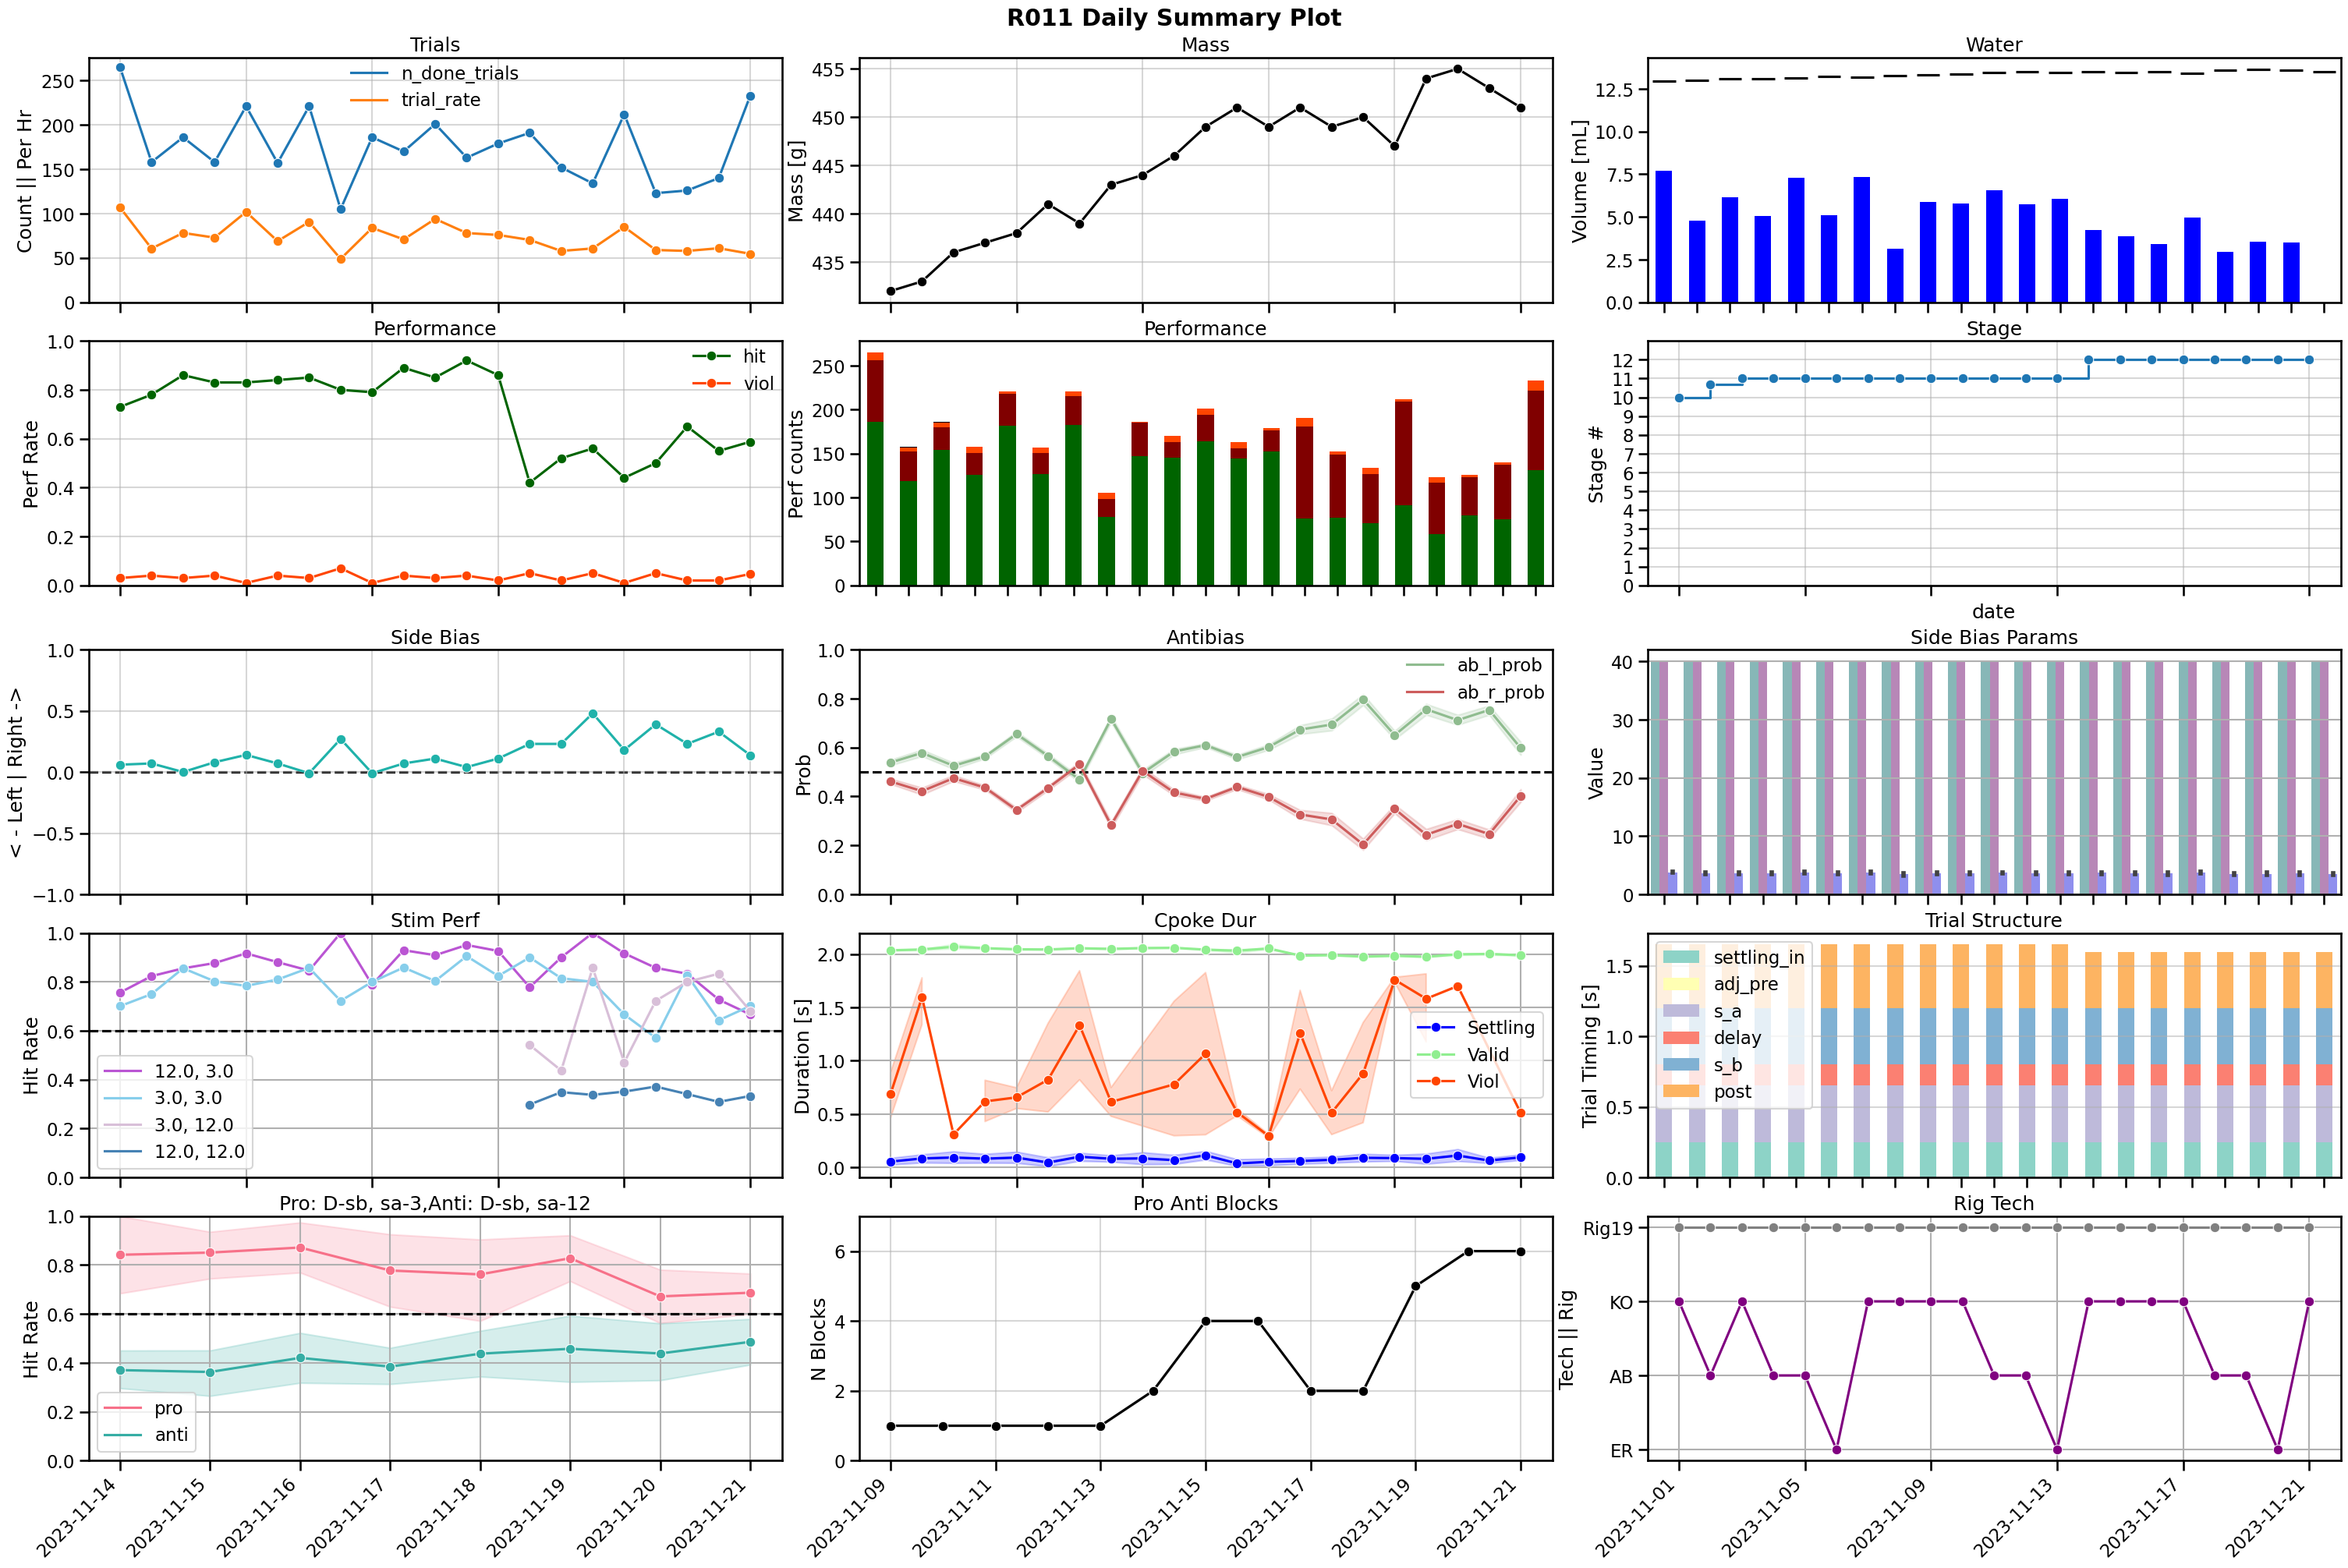

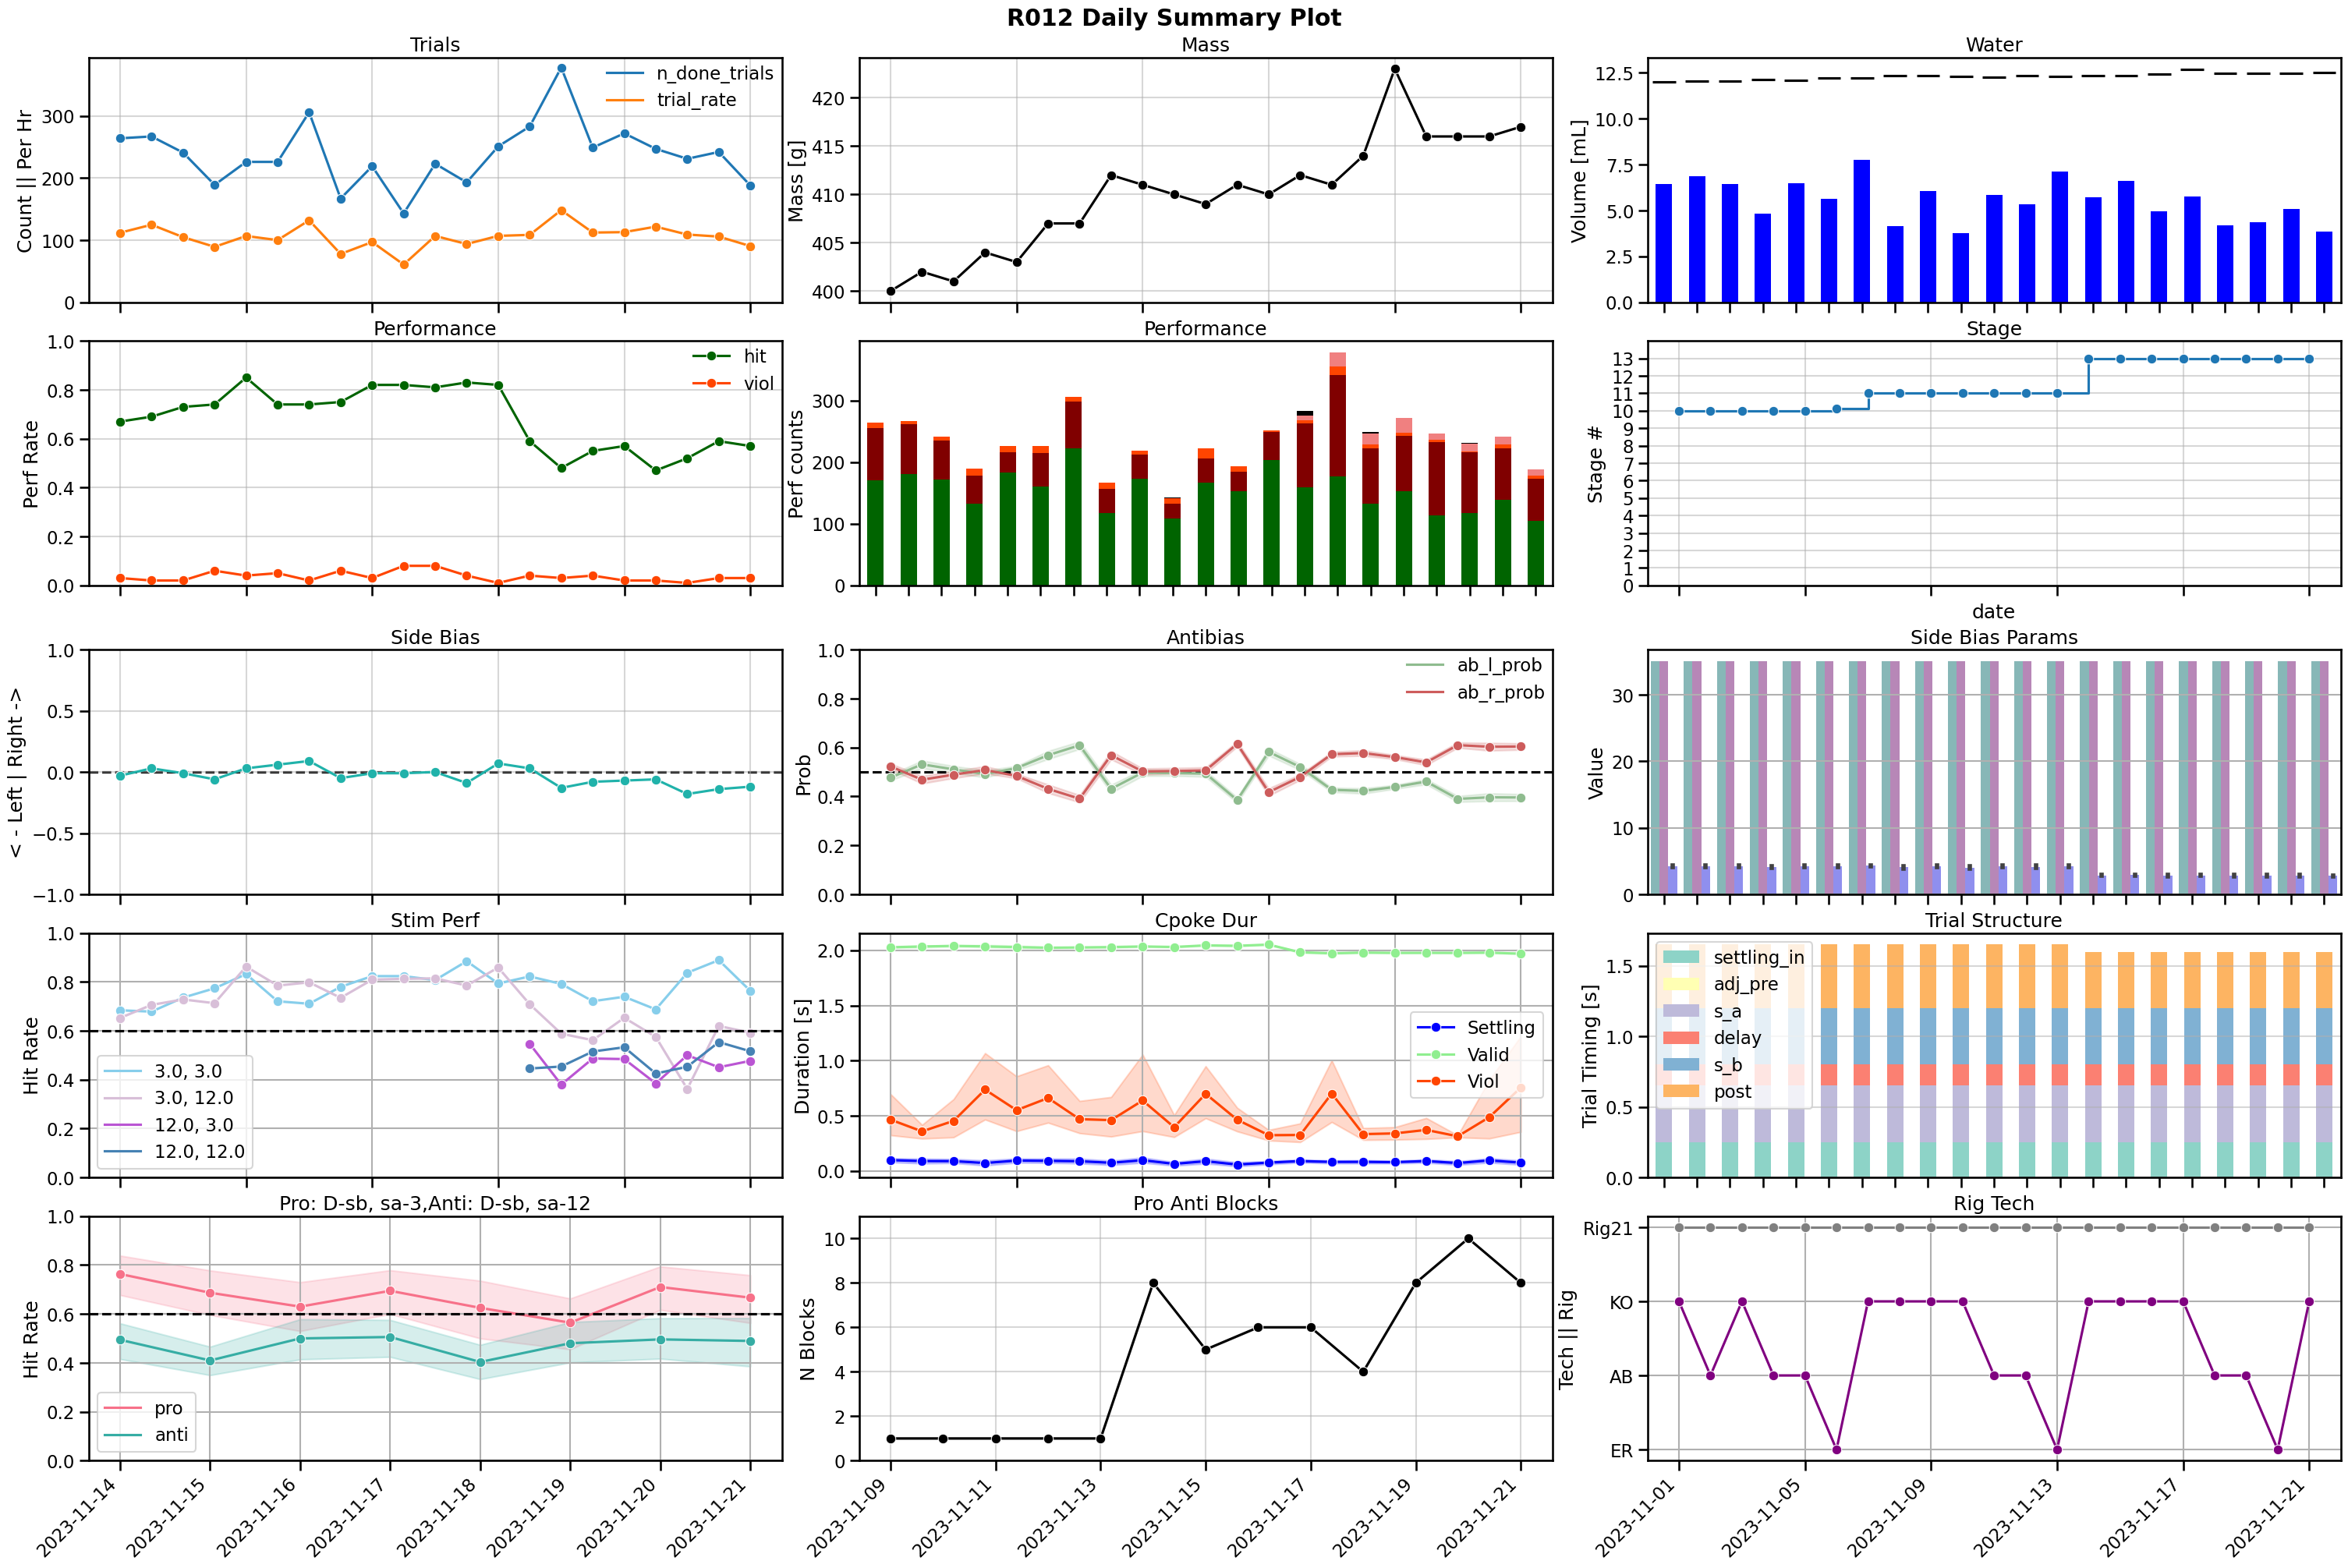

In [36]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [37]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R010_2023-11-21_day_summary
[]
skipping violations by period due to hist error


c:\Users\JB\github\jbreda_animal_training\code\training_performance\plot_trials_info.py:1351: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  _ = sns.histplot(


making R011_2023-11-21_day_summary
['s_a', 'delay', 's_b']
making R012_2023-11-21_day_summary
['s_a', 's_b', 'go']
